Kraus 연산자를 통해 사용자 정의 노이즈 모델을 생성하는 예시

In [1]:
from braket.circuits import Noise
import numpy as np
# general imports
import matplotlib.pyplot as plt
%matplotlib inline

import boto3
from braket.aws import AwsDevice
from braket.circuits import Circuit, Noise
from braket.devices import LocalSimulator


In [2]:
# 노이즈 시뮬레이터 디바이스 선택
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/dm1")

In [3]:
# 크라우스 연산자는 양자 채널을 나타내는 행렬입니다. 
# 첫번째 연산자에서는 단위 행렬에 0.5를 곱하여 특정 노이즈 모델을 생성. 양자 상태를 균일하게 혼합(mixing)하는 효과를 모델링

K0 = np.array([[1, 1], [1, 1]]) * 0.5

# 두번째 크라우스 연산자 정의, 양자 상태의 위상(phase) 관계를 반전시키는 효과를 가지며, 양자 채널에서 발생할 수 있는 위상 노이즈를 모델링하는 데 사용
K1 = np.array([[1, -1],[-1, 1]]) * 0.5

# 앞에서 정의한 K0와 K1 크라우스 연산자를 사용하여 Noise 객체를 생성합니다. 이 객체는 양자 회로에 적용할 노이즈 모델을 나타냅니다.
# Noise.Kraus는 Amazon Braket SDK에서 사용자 정의 양자 노이즈 채널을 생성하는 클래스
noise = Noise.Kraus([K0, K1])

circuit = Circuit().h(0).cnot(0, 1)
print(circuit)

#생성된 노이즈 모델을 회로의 모든 게이트에 적용
circuit.apply_gate_noise(noise)

T  : │  0  │  1  │
      ┌───┐       
q0 : ─┤ H ├───●───
      └───┘   │   
            ┌─┴─┐ 
q1 : ───────┤ X ├─
            └───┘ 
T  : │  0  │  1  │


Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Kraus('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Kraus('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Kraus('qubit_count': 1), 'target': QubitSet([Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1)])

In [4]:
result = device.run(circuit, shots=1000).result()
counts = result.measurement_counts
# print counts
print(counts)

Counter({'11': 261, '00': 255, '10': 244, '01': 240})


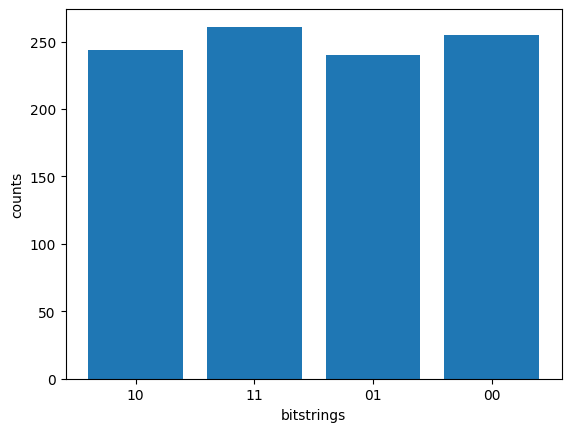

In [5]:
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');